# Stock Price Prediction using TensorFlow RNN
This notebook demonstrates how to use a Recurrent Neural Network (RNN) to predict stock prices based on historical data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [4]:
# https://rowzero.io/blog/yfinance
import yfinance as yf

In [5]:
# Load the stock data using yfinance
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [9]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088303,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320969,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484344,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2022-12-23,130.487793,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.676849,130.029999,131.410004,128.720001,131.380005,69007800


In [6]:
# # Load the stock data
# url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1609459200&period2=1672444800&interval=1d&events=history'
# # https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2024-12-16/2024-12-18?adjusted=true&sort=asc&apiKey=TcFnX3Mx8lNOfELRAFkv8yN0Jn4l4CX5
# data = pd.read_csv(url)


In [ ]:
# # Preprocess the data
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
# close_prices = data['Close'].values.reshape(-1, 1)
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(close_prices)

In [7]:
# Preprocess the data
data['Date'] = data.index
data.set_index('Date', inplace=True)
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [8]:
# Prepare the training data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [10]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [11]:
# Split into training and testing datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0324
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.4383e-04
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.8048e-04
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.0235e-04
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.7398e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8420e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.0212e-04
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.2946e-04
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.0612e-04
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.3602e-04
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.1907e-04
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.8625e-04
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.2852e-04
Epoch 15/20
18/18 ━━━━━

In [19]:
# Predict and inverse transform to get actual prices
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


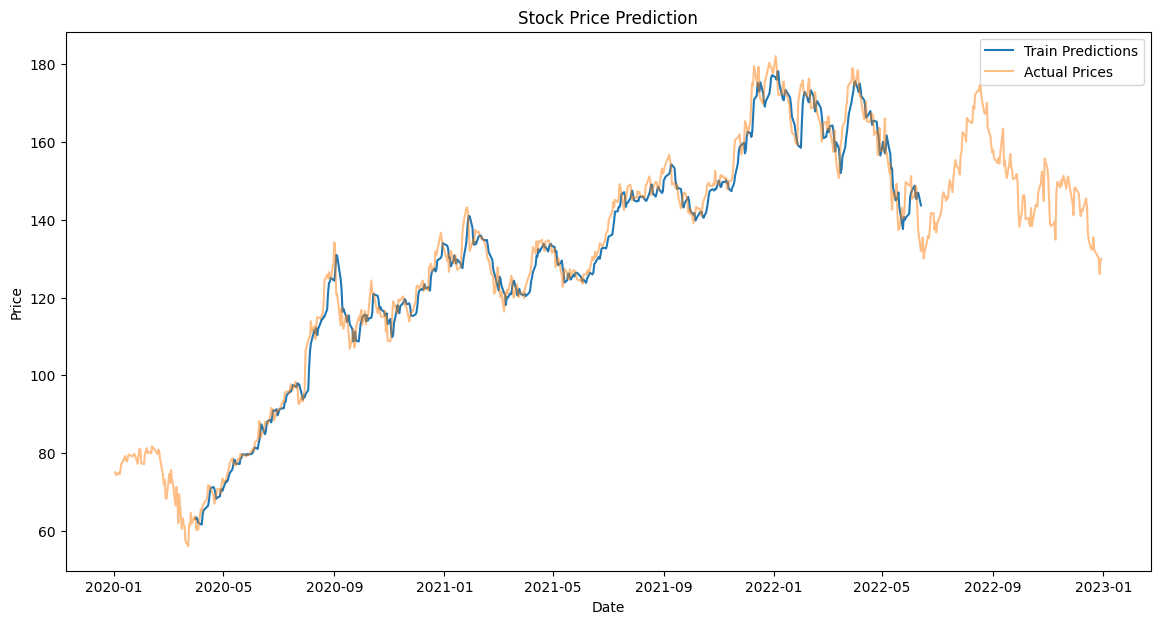

In [26]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step + 1:len(train_predict) + time_step + 1], train_predict, label='Train Predictions')
#plt.plot(data.index[len(train_predict) + (2 * time_step) + 1:], test_predict, label='Test Predictions')
plt.plot(data.index, close_prices, label='Actual Prices', alpha=0.5)
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [28]:
# Calculate the starting index for test predictions
test_start_index = len(scaled_data) - len(test_predict)
test_start_index

617

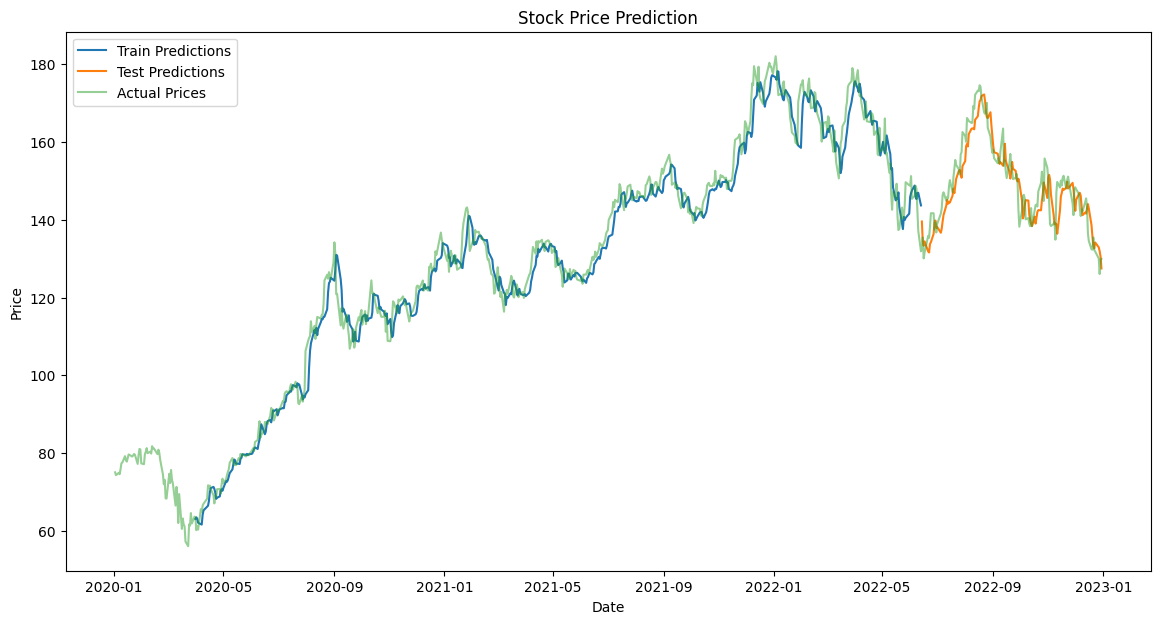

In [29]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step + 1:len(train_predict) + time_step + 1], train_predict, label='Train Predictions')
plt.plot(data.index[test_start_index:], test_predict, label='Test Predictions')  # Fixed this line
plt.plot(data.index, close_prices, label='Actual Prices', alpha=0.5)
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Make a real Prediction

In [40]:
time_step

60

In [47]:
# Extract the last `time_step` values
last_data = scaled_data[-time_step:]
last_data = last_data.reshape(1, time_step, 1)  # Reshape for model input

In [48]:
# Predict the next value (tomorrow's price)
predicted_price_scaled = model.predict(last_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [49]:
# Inverse transform to get the actual price
predicted_price = scaler.inverse_transform(predicted_price_scaled)

In [50]:
print(f"Predicted price for tomorrow: {predicted_price[0][0]:.2f}")

Predicted price for tomorrow: 129.32


### thanks but can I give a date and it makes a prediction?

In [54]:
def predict_future_price(start_date, end_date, model, scaler, scaled_data, time_step):
    import datetime

    # Calculate the number of days to predict
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    days_to_predict = (end_date - start_date).days

    # Use the last `time_step` prices as the initial input
    input_data = scaled_data[-time_step:].reshape(1, time_step, 1)
    future_predictions = []

    for _ in range(days_to_predict):
        # Predict the next price
        predicted_price_scaled = model.predict(input_data)

        # Append the prediction to the list
        future_predictions.append(predicted_price_scaled[0, 0])

        # Update the input data for the next prediction
        predicted_price_scaled_reshaped = predicted_price_scaled.reshape(1, 1, 1)  # Reshape for concatenation
        input_data = np.append(input_data[:, 1:, :], predicted_price_scaled_reshaped, axis=1)

    # Convert the predictions back to the original scale
    future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_prices

In [55]:
# Example usage
start_date = "2023-01-01"  # Starting from today or a specific date
end_date = "2023-01-05"    # Predict for the next 5 days
# start='2020-01-01', end='2023-01-01'

In [56]:
future_prices = predict_future_price(start_date, end_date, model, scaler, scaled_data, time_step)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [57]:
# Print the predictions
for i, price in enumerate(future_prices):
    prediction_date = (datetime.datetime.strptime(start_date, "%Y-%m-%d") + datetime.timedelta(days=i + 1)).strftime("%Y-%m-%d")
    print(f"Predicted price for {prediction_date}: {price[0]:.2f}")

Predicted price for 2023-01-02: 129.32
Predicted price for 2023-01-03: 129.02
Predicted price for 2023-01-04: 128.89
Predicted price for 2023-01-05: 128.54
